# Rodrigo_Mesquita_DR3_TP2
## Desenvolvimento de Data-Driven Apps com Python [24E4_3]
### Link Github: https://github.com/rodrigo1992-cmyk/DR3_TP2

# Parte 1: FastAPI

## Questão 1

Crie uma aplicação simples em FastAPI que utilize o modelo GPT-2 da HuggingFace para gerar textos a partir de uma entrada fornecida via requisição HTTP.

### O aplicativo deve:
- Receber uma frase de entrada como JSON.
- Utilizar a biblioteca transformers do HuggingFace para gerar um texto de saída.
- Retornar o texto gerado em uma resposta HTTP.

### O que é esperado:
- O aplicativo deve gerar uma continuação de texto a partir de uma frase de entrada e retornar a resposta formatada como JSON.

> O código foi dividido em 3 arquivos, o arquivo "services/main.py", "router/routes.py" e "model/models.py" 

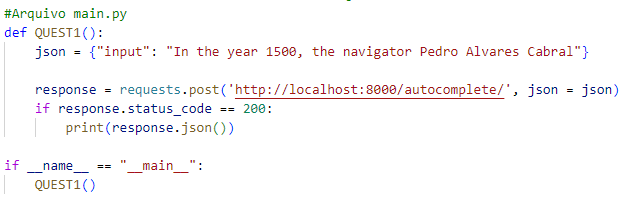

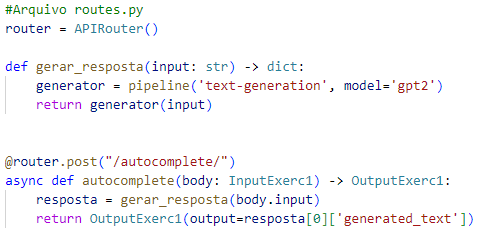


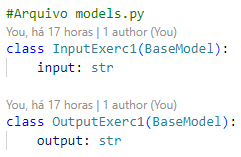

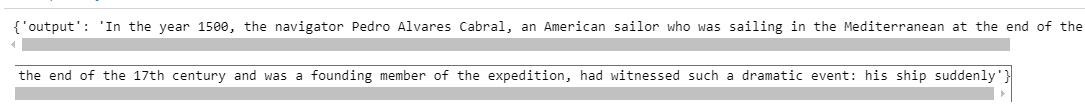

## Questão 2

Crie um aplicativo FastAPI que utiliza o modelo de tradução Helsinki-NLP/opus-mt-en-fr da HuggingFace para traduzir textos do inglês para o francês.

### A aplicação deve:
- Receber um texto em inglês via uma requisição HTTP.
- Traduzir o texto para o francês utilizando o modelo de tradução.
- Retornar o texto traduzido em uma resposta JSON.

### O que é esperado:
- A API deve receber um texto em inglês e retornar sua tradução para o francês, processando tanto frases curtas quanto textos mais longos.

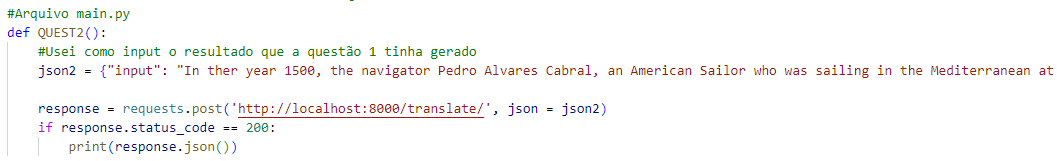

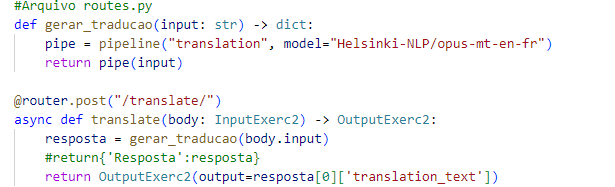

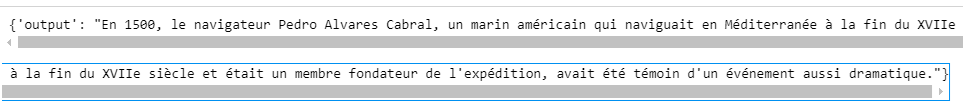

## Questão 3

Com base na API desenvolvida na Questão 2 (Parte 1), explique as principais limitações do modelo de tradução utilizado.

### Enumere e discuta:
- Limitações quanto à precisão da tradução.
- Desafios de tempo de resposta e desempenho em grande escala.
- Restrições de custo e escalabilidade.
- Limitações na tradução de gírias, expressões idiomáticas ou linguagem de contexto.

**1. Limitações quanto à precisão da tradução:** O framework Helsinki-NLP/Opus-MT foi treinado utilizando o modelo de DeepLearning Marian-NMT, desenvolvido pela Microsoft em conjunto com a Universidade de Edimburgo. Atualmente essa egine é utilizada pelas APIs de tradução comercializadas pela própria Microsoft e também utilizada por grandes corporações, como a Intel e o Ebay. Ou seja, se parametrizado adequadamente, apresenta grande confiabilidade e ótima compreensão de expressões linguísticas e ambiguidades, se comparado a métodos de tradução não baseados em NLP, abordados no ponto 4.

**2. Desafios de tempo de resposta e desempenho em grande escala:** No Benchmark apresentado no site oficial, a implementação original do Marian-NMT em C++ foi capaz de traduzir até 1.192 palavras por segundo utilizando GPU, uma performance 3x superior ao modelo de tradução estatística Moses sendo executado com o mesmo hardware. Em contrapartida, foi 2x mais lento quando utilizando somente CPU. Podemos inferir que o uso de um framework Python para implementação irá penalizar a performance e que a velocidade do modelo está diretamente associada à infraestrutura disponibilizada. O tempo de resposta dependerá de uma combinação de hardware, arquitetura para processamento de requisições em paralelo e localização dos servidores para melhor latência.

**3. Restrições de custo e escalabilidade:** O uso de infraestrutura própria é a maior restrição para escalabilidade, principalmente em situações de demanda elástica, em que não há a possibilidade de adequação da infra em tempo real, penalizando a experiência do usuário pelo sub-dimensionamento ou tendo ineficiência financeira pelo super-dimensionamento. Apesar de ser um modelo Open-Source, o uso de infraestrutura própria demanda grande investimento inicial, alto custo de manutenção e perda financeira através da depreciação de ativos. O deploy em VMs Cloud pode ser uma solução de contorno adequada, entretanto, demanda processos de governança e mão de obra especializados. 

A fim de comparação, soluções alternativas SAAS (Software-as-a-Service), como o "Google Translate API", "Azure AI Translator" ou "Amazon Translate API", são serviços cuja manutenção é de inteira responsabilidade do provedor. São preparados para demanda elástica e oferecem soluções para menor latência, como a hospedagem em multiplas regiões, que direciona cada requisição para o servidor mais próximo do cliente, eficaz para aplicações de uso global. Apesar de soluções SAAS oferecerem menor flexibilidade de customização, os provedores tendem a ofertar algumas opções distintas de contratação, para melhor se adequar à necessidade da empresa contratante.  

**4. Limitações na tradução de gírias, expressões idiomáticas ou linguagem de contexto:** A eficiência de um modelo de NLP na tradução de gírias, expressões idiomáticas ou palavras ambíguas, depende inteiramente da qualidade do corpus de treinamento e da capacidade do modelo em analisar contextos. Apesar disso, o uso de NLPs se mostra superior na captação das nuances linguísticas em comparação as demais alternativas de MT (Machine Translation), a saber:
 * RBMT (Rule-Based Machine Translation): Depende da criação manual de dicionários de paridade entre idiomas, e de regras linguísticas para traduzir texto de um idioma para outro.
 * SMT (Statistical Machine Translation): Modelos estatísticos que tentam identificar a tradução mais provável baseado em corpus bilíngues de exemplos. Quanto mais extenso e diverso o corpus, melhor a qualidade da tradução.

**Fontes**:
- https://huggingface.co/Helsinki-NLP/opus-mt-tc-big-fi-en
- https://github.com/Helsinki-NLP/Opus-MT
- https://marian-nmt.github.io
- https://marian-nmt.github.io/features/
- https://cloud.google.com/translate/docs/advanced/endpoints?hl=pt-br
- https://www.studysmarter.co.uk/explanations/english/linguistic-terms/machine-translation/#:~:text=Translation%20-%20Key%20takeaways-,Machine%20Translation%20(MT)%20is%20a%20subfield%20of%20computational%20linguistics%20that,Statistical%2C%20and%20Neural%20Machine%20Translation.

## Questão 4

Com base no modelo GPT-2 utilizado na Questão 1 (Parte 1), explique as principais limitações do modelo no contexto da geração de texto.

### Discuta:
- A coerência do texto gerado.
- Possíveis falhas ou incoerências geradas por LLMs.
- Desempenho e questões de latência.
- Limitações na geração de conteúdo apropriado.

**1. A coerência do texto gerado:** Era esperado que o modelo respondesse que ele descobriu ou colonizou o Brasil em 1500, entretanto a resposta gerada pelo modelo não citou este fato. A estrutura do texto também está incoerente, o trecho "navigator Pedro Alvares Cabral, an American sailor who was sailing" usa as palavras "navegador", "velejador" e "velejando" na mesma sequência. A resposta também se encerra no meio de uma frase, devido ao parâmetro de máximo de tokens.

**2. Possíveis falhas ou incoerências geradas por LLMs:** Não há erros sobre fatos históricos na resposta gerada, visto que Pedro Alvares Cabral não era americano e não viveu no século 17, mas sim entre os séculos 14 e 15. Talvez a resposta fosse fazer referência à parte da frota de Cabral que naufragou no Cabo da Boa Esperança, porém a frase ficou incompleta.

**3. Desempenho e questões de latência:** A execução foi realizada em i5-11Gen 2.40GHz, com apenas 8GB de RAM e sem o uso de GPU. Após o instanciamento do modelo, o retorno de uma resposta com max_length=50 levou em média 10 segundos. Ou seja, mesmo um modelo com baixo número de parâmetros (se comparado às versões 3 e 4) demanda maior capacidade computacional. Sem o uso de GPU é improvável que possa ser feito o deploy de um modelo para fins comerciais. 

**4. Limitações na geração de conteúdo apropriado:** O modelo não é capaz de checar a veracidade das informações apresentadas, mesmo que gerasse conteúdos que parecessem plausíveis, não há qualquer garantia da veracidade dos fatos. A falta de contextualização no prompt fornecido também foi um fator determinante, mesmo em modelos superiores, poderia levar a respostas que não atendem a expectativa do usuário.

# Parte 2: LangChain

## Questão 1

Desenvolva um protótipo utilizando LangChain que simule um chatbot simples com Fake LLM.

### A aplicação deve:
- Receber um input de texto via FastAPI.
- Retornar uma resposta simulada pelo Fake LLM.

### O que é esperado:
- O protótipo deve simular um chatbot básico que responde a perguntas pré-definidas.
- A arquitetura deve ser simples, e você deve explicar a importância de usar Fake LLM para testes rápidos.
- Desenhe um diagrama simples da arquitetura do aplicativo, detalhando as principais etapas do fluxo de dados.

### Reposta

Usar o FakeLLM durante o desenvolvimento pode auxiliar a:
* Evitar custos com chamadas desnecessárias à modelos pagos.
* Otimizar o tempo em desenvolvimentos locais, pois não será onerado pelo tempo de processamento dos modelos de LLM.
* Testar a lógica de programação sem interferência da interação com o modelo, isolando os erros.

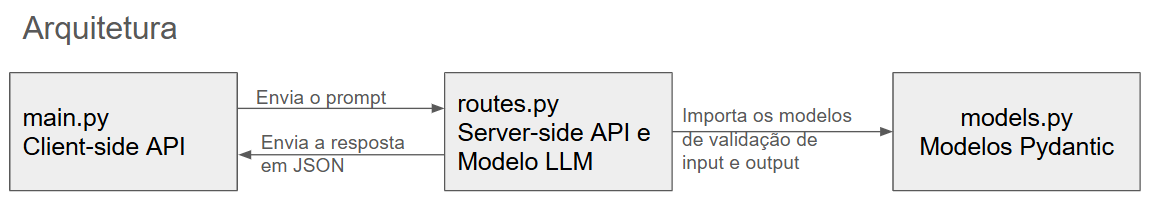

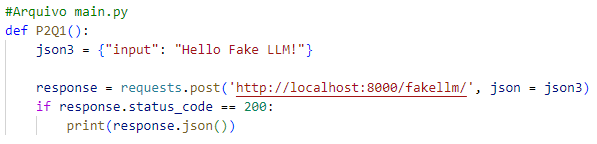

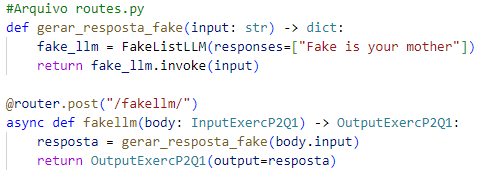

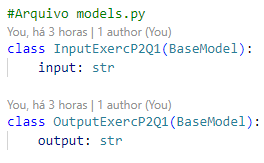

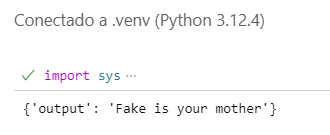

## Questão 2

Desenvolva um aplicativo que utilize LangChain para integrar a API da OpenAI.

### O aplicativo deve:
- Receber um texto em inglês via FastAPI.
- Traduzir o texto para o francês utilizando um modelo da OpenAI via LangChain.
- Retornar o texto traduzido em uma resposta JSON.

### O que é esperado:
- O aplicativo deve funcionar como uma API de tradução, semelhante à questão 2 (Parte 1), mas utilizando a OpenAI via LangChain.
- A aplicação deve gerenciar as chamadas à API da OpenAI e retornar a tradução com baixa latência.
- Forneça um diagrama da arquitetura da aplicação, destacando os componentes principais, como FastAPI, LangChain, e OpenAI.

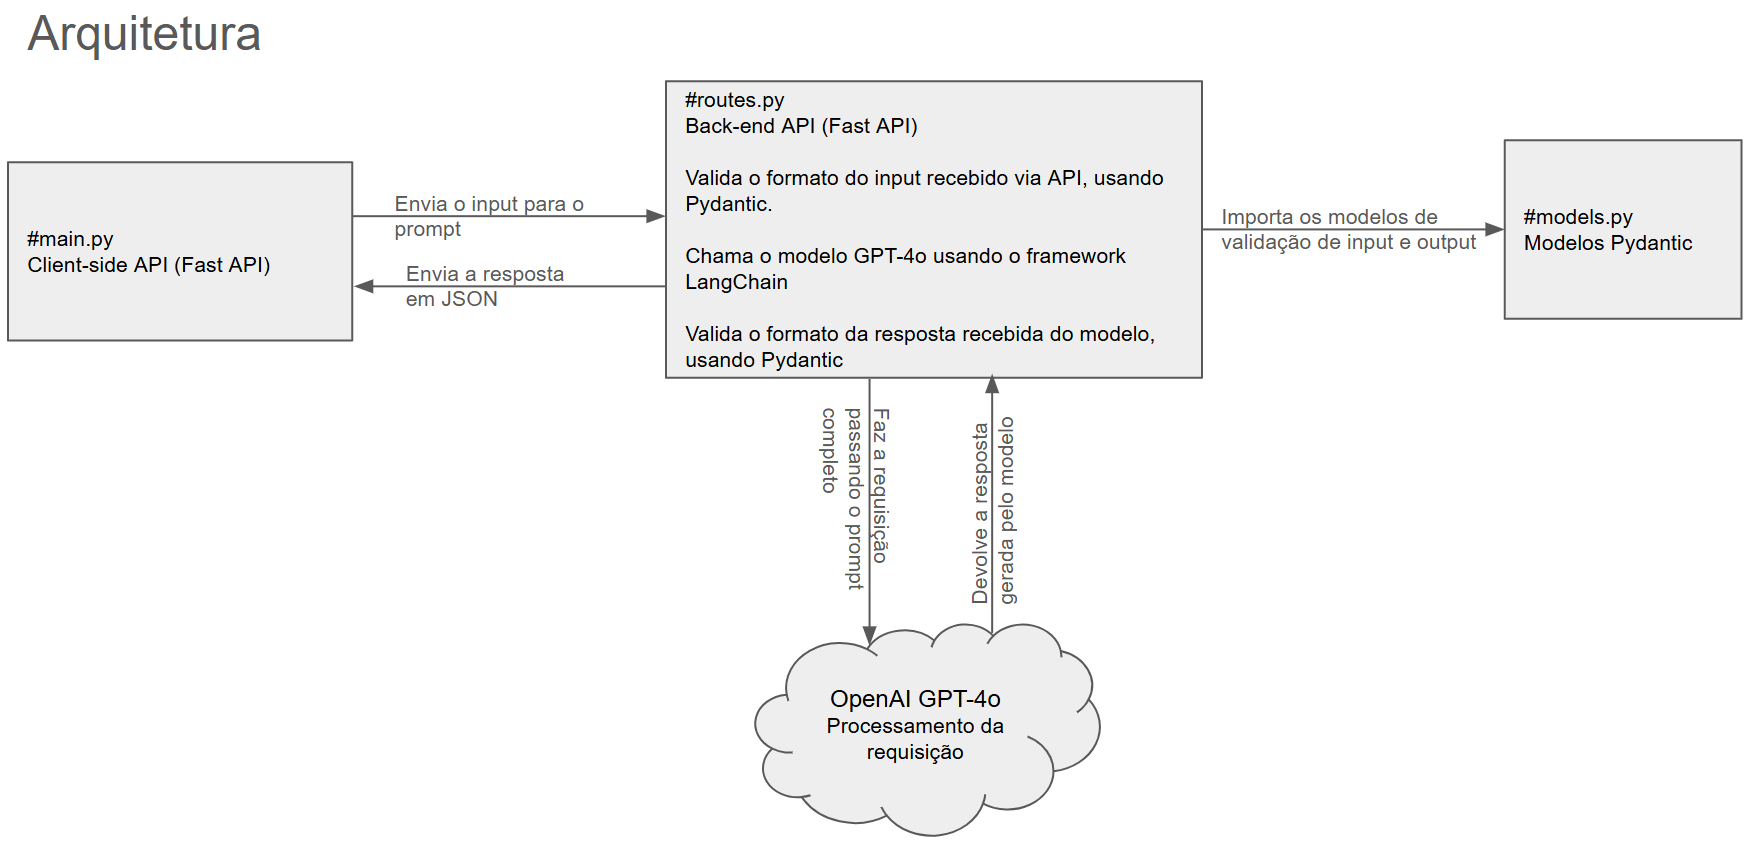

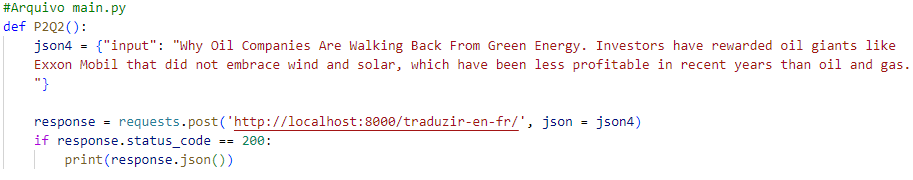

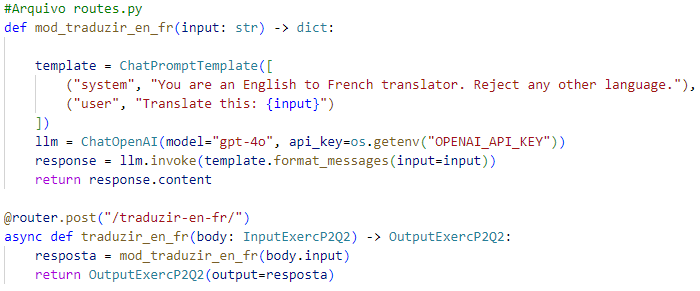

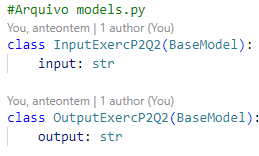

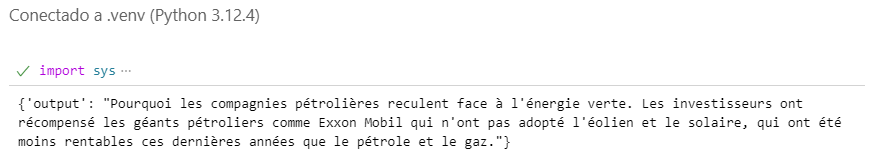

## Questão 3

Crie uma API semelhante à Questão 2 (Parte 2), mas que utilize o modelo Helsinki-NLP/opus-mt-en-de da HuggingFace para traduzir textos do inglês para o alemão.

### A aplicação deve:
- Receber um texto em inglês via FastAPI.
- Utilizar o LangChain para gerenciar as chamadas ao modelo HuggingFace.
- Retornar o texto traduzido para o alemão como resposta JSON.

### O que é esperado:
- O objetivo é que a aplicação funcione de maneira semelhante às Questões 2 (Parte 1) e 2 (Parte 2), mas desta vez integrando LangChain com HuggingFace.
- O modelo a ser utilizado deve ser o Helsinki-NLP/opus-mt-en-de.
- Forneça um diagrama detalhado da arquitetura da aplicação, destacando as interações entre FastAPI, LangChain, e HuggingFace.

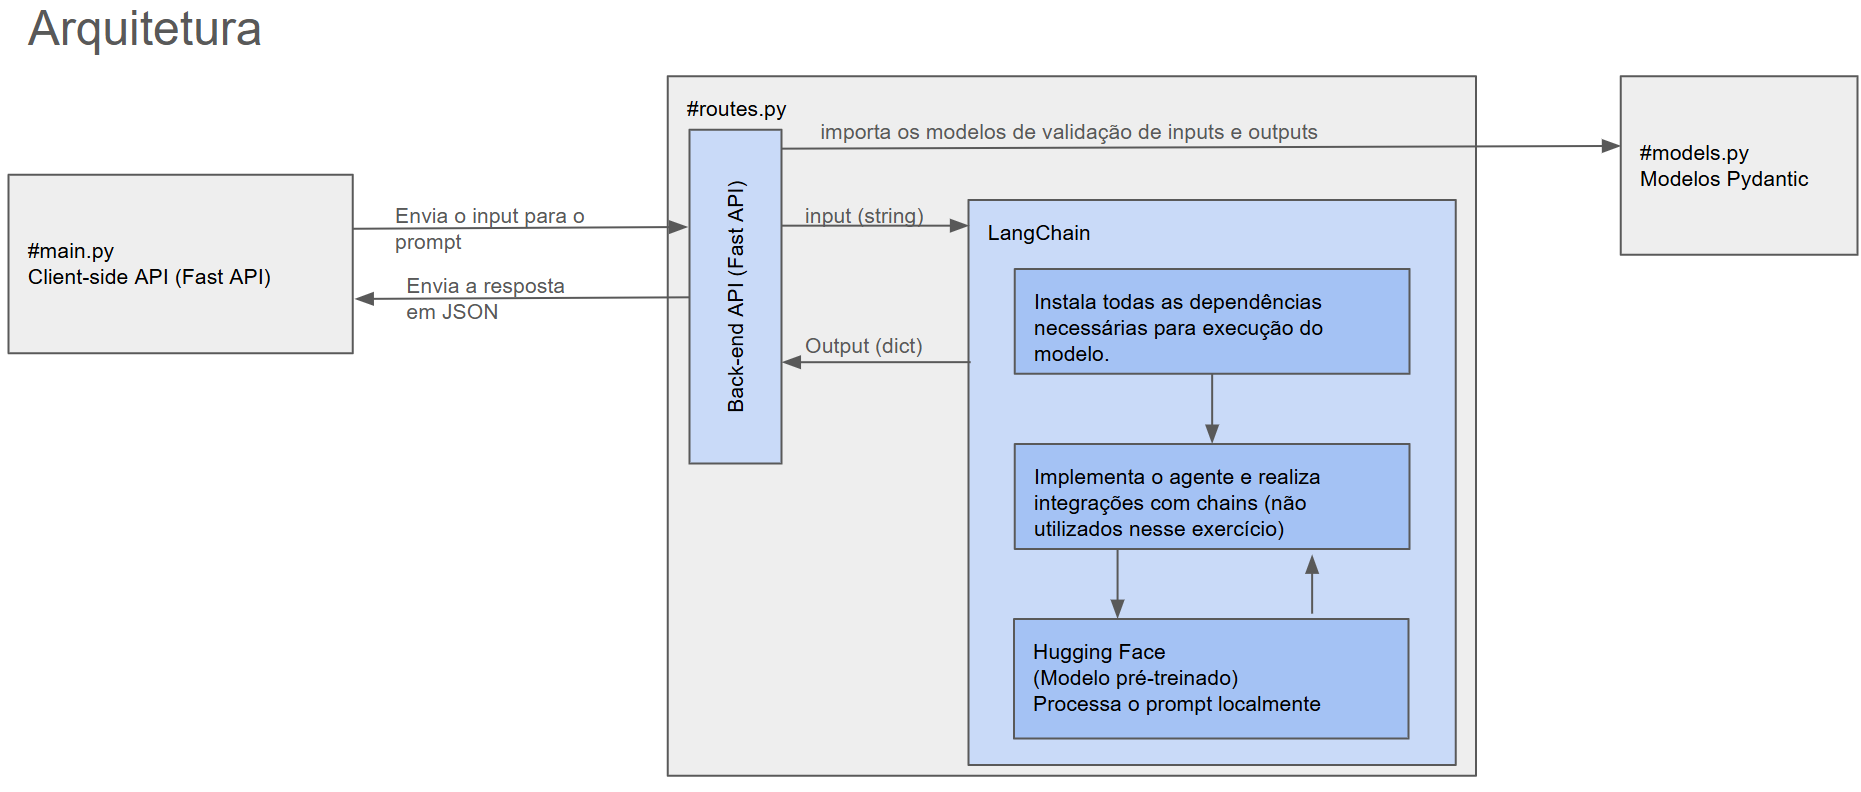

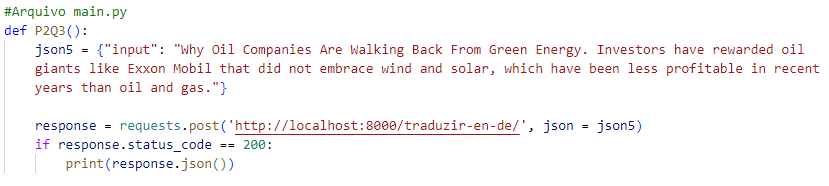

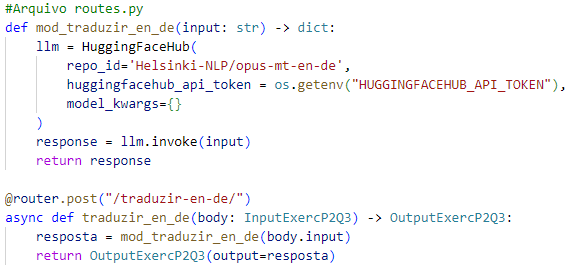

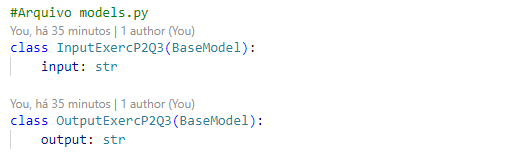

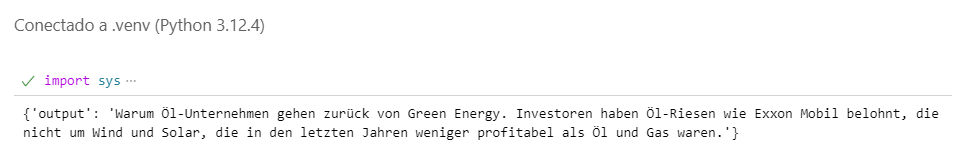

## Questão 4

Com base na implementação da Questão 2 (Parte 2), explique as principais limitações de utilizar LangChain para integrar a API da OpenAI.

### Discuta os seguintes aspectos:
- Latência de resposta.
- Limites de uso da API da OpenAI.
- Desafios de escalabilidade e custo.
- Qualidade das traduções geradas em comparação com outros modelos.

1. **Latência de resposta:** O GPT-4o via OpenAI não é indicado para aplicações de baixa latência e sua velocidade dependende da carga do servidor da OpenAI no momento da chamada (a execução do GPT-4o via Azure chega a ser 3x mais rápida). Existem opções também da Open AI com menor latência, modelos "GPT-4o mini" e "GPT-4 Turbo".
   
2. **Limites de uso da API da OpenAI:** A OpenAI implementa mecanismos para limitar o volume de chamadas por usuário, limitando em RPM (requisições por minuto), RPD (requisições por dia), TPM (tokens por minto) e TPD (tokens por dia), visando mitigar ataques maliciosos, uso indevido e sobrecarga do servidor. Os limites variam de acordo com o nível do usuário (Tier), que vai de 1 a 5, e é elevado automaticamente de acordo com o consumo mensal do usuário. Como exemplo, no GPT4-o, o Tier1 pode realizar 500 RPM, enquanto o Tier5 10,000 RPM. 
   
3. **Desafios de escalabilidade e custo:** O GPT4o tem um custo elevado, estando dentre os modelos mais caros, podendo ter um impacto significativo de acordo com a escalabilidade da aplicação. O uso do GPT4o-mini pode ter um custo até 16x menor. O quadro abaixo mostra o comparativo de custos entre diferentes modelos de LLM:

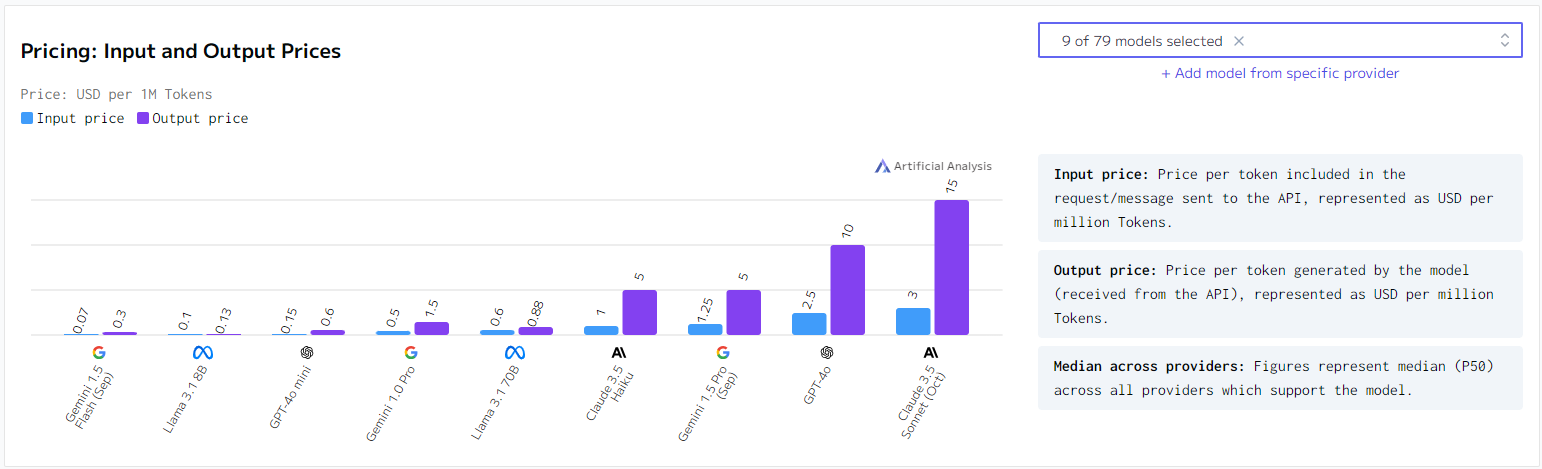

Fonte: artificialanalysis.ai

4. **Qualidade das traduções geradas em comparação com outros modelos:** A qualidade das traduções irá dependender da linguagem de origem e destino, entretanto, se utilizarmos como exemplo a tradução de inglês x espanhol e espanhol x inglês, podemos observar que a mediana dos modelos é bem próxima. Os gráficos abaixo utilizam a métrica de BLEU para realizar a comparação, com uma escala de 0 a 1, onde 0 indica nenhuma correspondência e 1 indica uma correspondência perfeita com as traduções de referência.

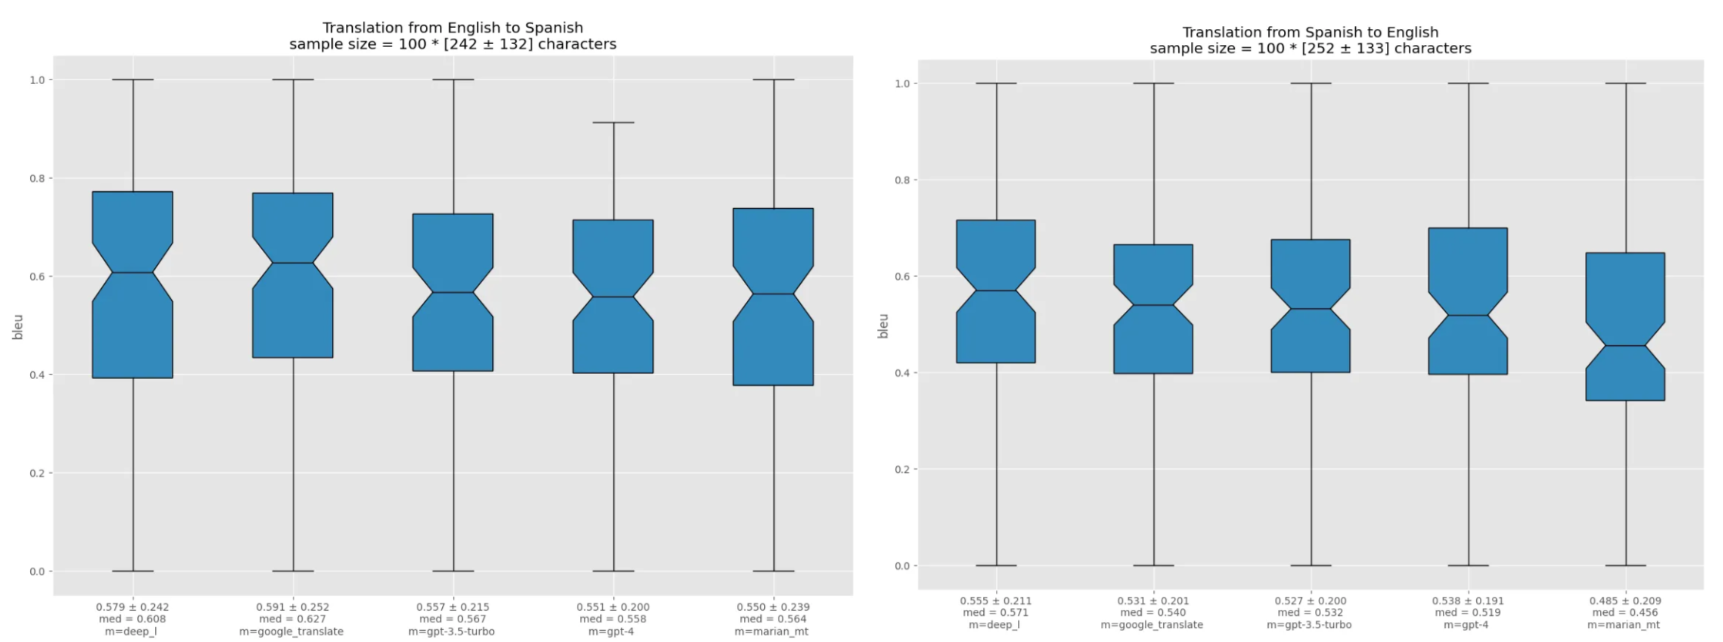

Fonte: medium.com/akvelon

<br> <br>
   
**Fontes:** 

https://mcplusa.com/comparing-performance-of-openai-gpt-4-and-microsoft-azure-gpt-4/#:~:text=On%20average%2C%20GPT-4%20via,times%20slower%20than%20Microsoft%20Azure.

https://platform.openai.com/docs/guides/rate-limits/usage-tiers?context=tier-four

https://artificialanalysis.ai/models#pricing

https://medium.com/akvelon/is-gpt-4-better-at-translation-than-google-translate-2fd39730af0e

## Questão 5

Com base na aplicação desenvolvida na Questão 3 (Parte 2), explique as limitações de usar LangChain para integrar o modelo HuggingFace de tradução.

### Discuta aspectos como:
- Desempenho e tempo de resposta.
- Consumo de recursos computacionais.
- Possíveis limitações no ajuste fino do modelo.
- Comparação com o uso direto da API HuggingFace.

1. **Desempenho e tempo de resposta:** A implementação via LangChain adiciona mais uma camada no processo, com certeza penalizando o tempo de resposta se comparada a implementação direta do modelo. Ainda assim, o modelo Helsinki-NLP é uma implementação Python do modelo Marian-NMT, que é um dos algoritimos de tradução mais rápidos disponíveis. 
2. **Consumo de recursos computacionais:** O modelo Marian-MT apresenta excelente performance, chegando a traduzir 1200 palavras por segundo nos testes realizados utilizando uma GPU GTX-1080.
3. **Possíveis limitações no ajuste fino do modelo:** O fine-tuning em modelos pré-treinados adiciona mais uma camada de treino, um aprendizado de contexto, e pode aumentar significativamente os resultados obtidos, entretanto se faz necessário ter um conjunto de dados relevante para o realizar.
4. **Comparação com o uso direto da API HuggingFace:** Ambos os modos de implementação são extremamente simples, entretanto foi notado um tempo maior para resposta na implementação via LangChain.


Fontes:
https://marian-nmt.github.io/features/
https://medium.com/@nexanodelabs/fine-tuning-vs-rag-choosing-the-right-approach-for-your-question-answering-system-7c7fbf5d4131


## Questão 6

Com base nas questões 1-2 (Parte 1) e 2-3 (Parte 2), desenvolva uma tabela comparativa que aborde os seguintes critérios:

### Critérios:
- Facilidade de uso/configuração.
- Latência e desempenho.
- Flexibilidade para diferentes modelos.
- Custo e escalabilidade.
- Adequação para protótipos versus aplicações em produção.

### A comparação deve ser apresentada em formato de tabela, com colunas dedicadas a cada critério e linhas comparando FastAPI puro com LangChain.

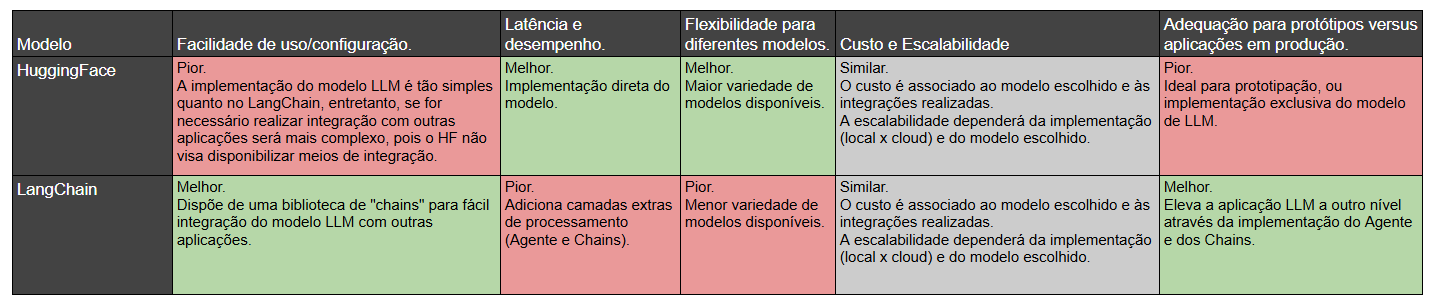